In [107]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [108]:
x1 = tf.constant([1,2,3,4,5])
x2 = tf.constant([6,7,8,9,10])

In [109]:
res = tf.multiply(x1,x2)
print(res)

Tensor("Mul_2:0", shape=(5,), dtype=int32)


In [110]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [111]:
with tf.Session() as sess:
    output = sess.run(res)
    print(output)

[ 6 14 24 36 50]


In [112]:
config = tf.ConfigProto(log_device_placement = True)
config = tf.ConfigProto(allow_soft_placement = True) 

# Aprendizaje neuronal de la señales de tráfico

In [113]:
import os
from skimage.io import imread

In [114]:
def load_ml_data(data_directory):
    dirs = [d for d in os.listdir(data_directory)
           if os.path.isdir(os.path.join(data_directory,d))]
    
    labels = []
    images = []
    for d in dirs:
        label_dir = os.path.join(data_directory, d)
        file_names = [os.path.join(label_dir, f)
                     for f in os.listdir(label_dir)
                     if f.endswith(".ppm")]
            
        for f in file_names:
            images.append(imread(f))
            labels.append(int(d))
    
    return images, labels

In [115]:
main_dir = "../datasets/belgian/"
train_data_dir = os.path.join(main_dir, "Training")
test_data_dir = os.path.join(main_dir, "Testing")

In [116]:
images, labels = load_ml_data(train_data_dir)

In [117]:
len(images)

11

In [118]:
type(images)

list

In [119]:
import numpy as np

In [120]:
images = np.array(images)

In [121]:
labels = np.array(labels)

In [122]:
images.ndim

4

In [123]:
images.size

16789905

In [124]:
images[0]

array([[[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24]],

       [[ 75,  56,  36],
        [ 75,  56,  36],
        [ 75,  56,  36],
        ...,
        [143, 155, 170],
        [143, 155, 170],
        [ 24,  24,  24]],

       [[ 75,  56,  36],
        [ 75,  56,  36],
        [ 75,  56,  36],
        ...,
        [143, 155, 170],
        [143, 155, 170],
        [ 24,  24,  24]],

       ...,

       [[ 85,  57,  32],
        [ 84,  56,  31],
        [ 83,  55,  30],
        ...,
        [194, 186, 192],
        [194, 186, 193],
        [ 24,  24,  24]],

       [[ 78,  51,  26],
        [ 77,  49,  25],
        [ 77,  49,  25],
        ...,
        [150, 144, 161],
        [165, 160, 177],
        [ 24,  24,  24]],

       [[ 74,  46,  22],
        [ 74,  46,  22],
        [ 73,  45,  21],
        ...,
        [103,  97, 114],
        [118, 112, 129],
        [ 24,  24,  24]]

In [125]:
labels.ndim

1

In [126]:
labels.size

11

In [127]:
len(set(labels))

11

In [128]:
images.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [129]:
images.itemsize

1

In [130]:
images.nbytes

16789905

In [131]:
images.nbytes/images.itemsize

16789905.0

In [132]:
import matplotlib.pyplot as plt

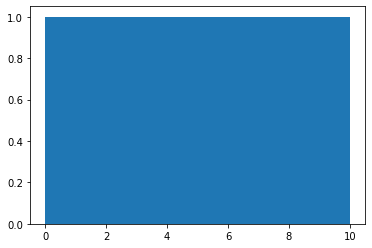

In [133]:
plt.hist(labels, len(set(labels)))
plt.show()

In [134]:
import random

In [135]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs

[9, 2, 8, 0, 4, 5]

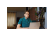

Forma:(535, 951, 3), min:0, max:244


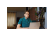

Forma:(535, 951, 3), min:0, max:244


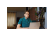

Forma:(535, 951, 3), min:0, max:244


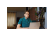

Forma:(535, 951, 3), min:0, max:244


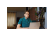

Forma:(535, 951, 3), min:0, max:244


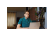

Forma:(535, 951, 3), min:0, max:244


In [136]:
for i in range(len(rand_signs)):
    temp_im = images[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

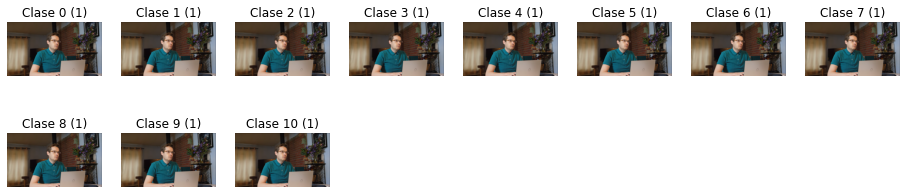

In [137]:
unique_labels = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_labels:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title("Clase {0} ({1})".format(label, list(labels).count(label)))
    i +=1
    plt.imshow(temp_im)
plt.show()

In [138]:
type(labels)

numpy.ndarray

# Modelo de Red Neuronal con TensorFlow
* Las imagenes no todas son del mismo tamaño
* Hay 62 imagenes (de 0 al 61)
* La distribucion de imagenes no es uniforme (algunas salen más veces que otras)

In [139]:
from skimage import transform

In [140]:
w = 9999
h = 9999
for image in images:
    if image.shape[0] < h:
        h = image.shape[0]
    if image.shape[1] > w:
        w = image.shape[1]
print("Tamaño mínimo: {0}x{1}".format(h,w))

Tamaño mínimo: 535x9999


In [141]:
images30 = [transform.resize(image, (30,30)) for image in images]

In [142]:
images30[0]

array([[[0.28627451, 0.21568627, 0.13333333],
        [0.28398693, 0.21568627, 0.13333333],
        [0.28627451, 0.21568627, 0.13333333],
        ...,
        [0.19379085, 0.21633987, 0.2504085 ],
        [0.2154902 , 0.23117647, 0.24666667],
        [0.46529412, 0.51098039, 0.55861111]],

       [[0.29803922, 0.22745098, 0.14117647],
        [0.29803922, 0.22730392, 0.14117647],
        [0.29803922, 0.22745098, 0.14117647],
        ...,
        [0.24215686, 0.25686275, 0.26936275],
        [0.21529412, 0.2272549 , 0.23509804],
        [0.47176471, 0.51691176, 0.56588235]],

       [[0.30588235, 0.23529412, 0.14901961],
        [0.30588235, 0.23529412, 0.14901961],
        [0.30196078, 0.23137255, 0.14509804],
        ...,
        [0.16315359, 0.1751634 , 0.17606209],
        [0.20763072, 0.22313725, 0.2272549 ],
        [0.46784314, 0.51235294, 0.55803922]],

       ...,

       [[0.4003268 , 0.28660131, 0.17287582],
        [0.39281046, 0.26732026, 0.14575163],
        [0.37320261, 0

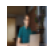

Forma:(30, 30, 3), min:0.03137254901960784, max:0.8588235294117648


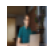

Forma:(30, 30, 3), min:0.03137254901960784, max:0.8588235294117648


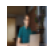

Forma:(30, 30, 3), min:0.03137254901960784, max:0.8588235294117648


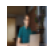

Forma:(30, 30, 3), min:0.03137254901960784, max:0.8588235294117648


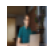

Forma:(30, 30, 3), min:0.03137254901960784, max:0.8588235294117648


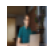

Forma:(30, 30, 3), min:0.03137254901960784, max:0.8588235294117648


In [143]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im)
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [144]:
from skimage.color import rgb2gray

In [145]:
images30 = np.array(images30)
images30 = rgb2gray(images30)

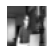

Forma:(30, 30), min:0.03638745098039216, max:0.7588470588235294


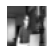

Forma:(30, 30), min:0.03638745098039216, max:0.7588470588235294


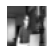

Forma:(30, 30), min:0.03638745098039216, max:0.7588470588235294


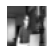

Forma:(30, 30), min:0.03638745098039216, max:0.7588470588235294


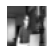

Forma:(30, 30), min:0.03638745098039216, max:0.7588470588235294


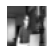

Forma:(30, 30), min:0.03638745098039216, max:0.7588470588235294


In [146]:
rand_signs = random.sample(range(0, len(labels)), 6)
rand_signs
for i in range(len(rand_signs)):
    temp_im = images30[rand_signs[i]]
    plt.subplot(1,6,i+1)
    plt.axis("off")
    plt.imshow(temp_im, cmap="gray")
    plt.subplots_adjust(wspace = 0.5)
    plt.show()
    print("Forma:{0}, min:{1}, max:{2}".format(temp_im.shape,
                                               temp_im.min(),
                                               temp_im.max()))

In [150]:
x = tf.placeholder(dtype = tf.float32, shape = [None, 30,30])
y = tf.placeholder(dtype = tf.int32, shape = [None])

images_flat = tf.contrib.layers.flatten(x)
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits=logits))

train_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

final_pred = tf.argmax(logits,1)

accuracy = tf.reduce_mean(tf.cast(final_pred, tf.float32))

AttributeError: module 'tensorflow.compat.v1' has no attribute 'contrib'

In [148]:
images_flat

NameError: name 'images_flat' is not defined

In [45]:
logits

NameError: name 'logits' is not defined

In [87]:
loss

NameError: name 'loss' is not defined

In [88]:
final_pred

NameError: name 'final_pred' is not defined

In [156]:
tf.set_random_seed(1234)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for i in range(300):
    _, accuracy_val = sess.run([train_opt, accuracy],
                               feed_dict= {
                                   x: images30,
                                   y: list(labels)
                               })
    _, loss_val = sess.run([train_opt, loss],
                               feed_dict= {
                                   x: images30,
                                   y: list(labels)
                               })
    
    if i%10 == 0:
        print("EPOCH", i)
        print("Eficacia: ", accuracy_val)
        print("Perdida: ", loss_val)
    #print("Fin de Epoch ", i)

NameError: name 'train_opt' is not defined

# Evaluacion de la Red Neuronal

In [157]:
sample_idx = random.sample(range(len(images30)), 16)
sample_images = (images30[i] for i in sample_idx)
sample_labels = (labels[i] for i in sample_idx)

ValueError: Sample larger than population or is negative

In [158]:
prediction = sess.run([final_pred], feed_dict={x:sample_images})[0]

NameError: name 'final_pred' is not defined

In [159]:
prediction

NameError: name 'prediction' is not defined

In [160]:
sample_labels

NameError: name 'sample_labels' is not defined

In [164]:
plt.figure(figsize=(16,9))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    predi = prediction[i]
    plt.subplot(4,4,i+1)
    plt.axis("off")
    color = "green" if truth==predi else "red"
    plt.text(32,15, "Real:        {0}\nPrediccion:{1}".format(truth, predi),
            fontsize = 14, color = color)
    plt.imshow(sample_images[i], cmap="gray")
plt.show()

NameError: name 'sample_images' is not defined

<Figure size 1152x648 with 0 Axes>

In [165]:
test_images, test_labels = load_ml_data(test_data_dir)

In [166]:
test_images30 = [transform.resize(im,(30,30)) for im in test_images]

In [167]:
test_images30 = rgb2gray(np.array(test_images30))

In [168]:
prediction = sess.run([final_pred], feed_dict={x:test_images30})[0]

NameError: name 'final_pred' is not defined

In [169]:
match_count = sum([int (10 == lp) for 10, lp in zip(test_labels, prediction)])
match_count

SyntaxError: cannot assign to literal (<ipython-input-169-ac87d57c70af>, line 1)

In [170]:
acc = match_count/len(test_labels)*100
print("Eficacia de la red neuronal: (:.f)".format(acc))

NameError: name 'match_count' is not defined